In [8]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from pandas import DataFrame
from datetime import datetime
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers import Conv1D, MaxPooling1D ,AveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras import backend as K
# from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
#from tensorflow.keras.optimizers import Adam
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

# < Important note > [ Please download input data from https://mega.nz/#F!CeYGDKyS!uqkmWJ4E2XSGJp_C2VO2gg]
# IC50evaluation//Dataset//Scenario4_EC-11K_znorm_single_drug_model_approach//individual_drugs

workdir = "path//individual_drugs"

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13096922726623261306
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 18038862643
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15860581224697039350
physical_device_desc: "device: 0, name: TITAN RTX, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [10]:
# parsing each name of 24 datasets
file_list = os.listdir(workdir)

drug_list = []
for x in range(len(file_list)):
    drug_file = file_list[x].split("_")[2].split(".")[0]
    drug_list.append(drug_file)

len(drug_list)

In [12]:
# In[21]:

num_classes = 1
learning_rate = 0.0002
training_epochs = 40
batch_size = 50
# img_rows, img_cols = 154, 154


17-AAG_//n
train_X shape: (392, 18988, 1)
392 train samples
98 test samples
StartTime : 2019-12-12 23:12:57.210902
StartTime : 2019-12-12 23:12:57.486902
Train on 392 samples, validate on 98 samples
Epoch 1/40
392/392 [==============================] - 1s 2ms/step - loss: 5.2065 - mean_squared_error: 5.2065 - mean_absolute_error: 2.0069 - val_loss: 5.2652 - val_mean_squared_error: 5.2652 - val_mean_absolute_error: 1.9854
Epoch 2/40
392/392 [==============================] - 0s 390us/step - loss: 4.7406 - mean_squared_error: 4.7406 - mean_absolute_error: 1.9020 - val_loss: 4.6480 - val_mean_squared_error: 4.6480 - val_mean_absolute_error: 1.8431
Epoch 3/40
392/392 [==============================] - 0s 390us/step - loss: 4.0364 - mean_squared_error: 4.0364 - mean_absolute_error: 1.7289 - val_loss: 3.4151 - val_mean_squared_error: 3.4151 - val_mean_absolute_error: 1.5459
Epoch 4/40
392/392 [==============================] - 0s 378us/step - loss: 3.0791 - mean_squared_error: 3.0791 - mean_

Epoch 36/40
392/392 [==============================] - 0s 349us/step - loss: 0.4279 - mean_squared_error: 0.4279 - mean_absolute_error: 0.4948 - val_loss: 1.7903 - val_mean_squared_error: 1.7903 - val_mean_absolute_error: 1.0611
Epoch 37/40
392/392 [==============================] - 0s 347us/step - loss: 0.4205 - mean_squared_error: 0.4205 - mean_absolute_error: 0.5035 - val_loss: 1.7704 - val_mean_squared_error: 1.7704 - val_mean_absolute_error: 1.0517
Epoch 38/40
392/392 [==============================] - 0s 362us/step - loss: 0.4331 - mean_squared_error: 0.4331 - mean_absolute_error: 0.4953 - val_loss: 1.8070 - val_mean_squared_error: 1.8070 - val_mean_absolute_error: 1.0658
Epoch 39/40
392/392 [==============================] - 0s 355us/step - loss: 0.4329 - mean_squared_error: 0.4329 - mean_absolute_error: 0.5027 - val_loss: 1.7892 - val_mean_squared_error: 1.7892 - val_mean_absolute_error: 1.0624
Epoch 40/40
392/392 [==============================] - 0s 360us/step - loss: 0.4187 

392/392 [==============================] - 0s 367us/step - loss: 0.6337 - mean_squared_error: 0.6337 - mean_absolute_error: 0.5981 - val_loss: 0.5868 - val_mean_squared_error: 0.5868 - val_mean_absolute_error: 0.5673
Epoch 25/40
392/392 [==============================] - 0s 372us/step - loss: 0.5380 - mean_squared_error: 0.5380 - mean_absolute_error: 0.5749 - val_loss: 0.6145 - val_mean_squared_error: 0.6145 - val_mean_absolute_error: 0.4927
Epoch 26/40
392/392 [==============================] - 0s 378us/step - loss: 0.4311 - mean_squared_error: 0.4311 - mean_absolute_error: 0.5067 - val_loss: 0.5681 - val_mean_squared_error: 0.5681 - val_mean_absolute_error: 0.5348
Epoch 27/40
392/392 [==============================] - 0s 360us/step - loss: 0.4258 - mean_squared_error: 0.4258 - mean_absolute_error: 0.5031 - val_loss: 0.6178 - val_mean_squared_error: 0.6178 - val_mean_absolute_error: 0.4866
Epoch 28/40
392/392 [==============================] - 0s 367us/step - loss: 0.3625 - mean_squar

392/392 [==============================] - 0s 372us/step - loss: 0.6237 - mean_squared_error: 0.6237 - mean_absolute_error: 0.5057 - val_loss: 0.3206 - val_mean_squared_error: 0.3206 - val_mean_absolute_error: 0.3438
Epoch 13/40
392/392 [==============================] - 0s 370us/step - loss: 0.6219 - mean_squared_error: 0.6219 - mean_absolute_error: 0.5312 - val_loss: 0.3216 - val_mean_squared_error: 0.3216 - val_mean_absolute_error: 0.3651
Epoch 14/40
392/392 [==============================] - 0s 367us/step - loss: 0.6100 - mean_squared_error: 0.6100 - mean_absolute_error: 0.5347 - val_loss: 0.3258 - val_mean_squared_error: 0.3258 - val_mean_absolute_error: 0.2789
Epoch 15/40
392/392 [==============================] - 0s 372us/step - loss: 0.5716 - mean_squared_error: 0.5716 - mean_absolute_error: 0.4877 - val_loss: 0.3192 - val_mean_squared_error: 0.3192 - val_mean_absolute_error: 0.3455
Epoch 16/40
392/392 [==============================] - 0s 370us/step - loss: 0.5380 - mean_squar

StartTime : 2019-12-12 23:13:42.756902
Train on 382 samples, validate on 96 samples
Epoch 1/40
382/382 [==============================] - 1s 3ms/step - loss: 3.5562 - mean_squared_error: 3.5562 - mean_absolute_error: 1.8591 - val_loss: 2.7680 - val_mean_squared_error: 2.7680 - val_mean_absolute_error: 1.6401
Epoch 2/40
382/382 [==============================] - 0s 393us/step - loss: 2.4405 - mean_squared_error: 2.4405 - mean_absolute_error: 1.5180 - val_loss: 1.2626 - val_mean_squared_error: 1.2626 - val_mean_absolute_error: 1.0890
Epoch 3/40
382/382 [==============================] - 0s 393us/step - loss: 1.1481 - mean_squared_error: 1.1481 - mean_absolute_error: 0.9337 - val_loss: 0.4104 - val_mean_squared_error: 0.4104 - val_mean_absolute_error: 0.3914
Epoch 4/40
382/382 [==============================] - 0s 387us/step - loss: 0.8349 - mean_squared_error: 0.8349 - mean_absolute_error: 0.6360 - val_loss: 0.5352 - val_mean_squared_error: 0.5352 - val_mean_absolute_error: 0.3712
Epoch 

392/392 [==============================] - 0s 372us/step - loss: 0.2053 - mean_squared_error: 0.2053 - mean_absolute_error: 0.3591 - val_loss: 0.5608 - val_mean_squared_error: 0.5608 - val_mean_absolute_error: 0.3291
Epoch 31/40
392/392 [==============================] - 0s 370us/step - loss: 0.2599 - mean_squared_error: 0.2599 - mean_absolute_error: 0.4197 - val_loss: 0.5258 - val_mean_squared_error: 0.5258 - val_mean_absolute_error: 0.3330
Epoch 32/40
392/392 [==============================] - 0s 383us/step - loss: 0.2435 - mean_squared_error: 0.2435 - mean_absolute_error: 0.3942 - val_loss: 0.5363 - val_mean_squared_error: 0.5363 - val_mean_absolute_error: 0.3263
Epoch 33/40
392/392 [==============================] - 0s 367us/step - loss: 0.2001 - mean_squared_error: 0.2001 - mean_absolute_error: 0.3635 - val_loss: 0.5070 - val_mean_squared_error: 0.5070 - val_mean_absolute_error: 0.3649
Epoch 34/40
392/392 [==============================] - 0s 372us/step - loss: 0.2418 - mean_squar

325/325 [==============================] - 0s 394us/step - loss: 0.5650 - mean_squared_error: 0.5650 - mean_absolute_error: 0.4867 - val_loss: 1.2077 - val_mean_squared_error: 1.2077 - val_mean_absolute_error: 0.3817
Epoch 19/40
325/325 [==============================] - 0s 394us/step - loss: 0.5063 - mean_squared_error: 0.5063 - mean_absolute_error: 0.4486 - val_loss: 1.1045 - val_mean_squared_error: 1.1045 - val_mean_absolute_error: 0.3860
Epoch 20/40
325/325 [==============================] - 0s 388us/step - loss: 0.4927 - mean_squared_error: 0.4927 - mean_absolute_error: 0.4406 - val_loss: 1.2810 - val_mean_squared_error: 1.2810 - val_mean_absolute_error: 0.4178
Epoch 21/40
325/325 [==============================] - 0s 394us/step - loss: 0.4521 - mean_squared_error: 0.4521 - mean_absolute_error: 0.4420 - val_loss: 1.1187 - val_mean_squared_error: 1.1187 - val_mean_absolute_error: 0.3821
Epoch 22/40
325/325 [==============================] - 0s 391us/step - loss: 0.4810 - mean_squar

392/392 [==============================] - 0s 383us/step - loss: 5.4245 - mean_squared_error: 5.4245 - mean_absolute_error: 1.6936 - val_loss: 3.3255 - val_mean_squared_error: 3.3255 - val_mean_absolute_error: 1.2207
Epoch 7/40
392/392 [==============================] - 0s 380us/step - loss: 5.5617 - mean_squared_error: 5.5617 - mean_absolute_error: 1.6755 - val_loss: 3.4023 - val_mean_squared_error: 3.4023 - val_mean_absolute_error: 1.3554
Epoch 8/40
392/392 [==============================] - 0s 380us/step - loss: 5.6470 - mean_squared_error: 5.6470 - mean_absolute_error: 1.8132 - val_loss: 3.6656 - val_mean_squared_error: 3.6656 - val_mean_absolute_error: 1.5000
Epoch 9/40
392/392 [==============================] - 0s 383us/step - loss: 5.5963 - mean_squared_error: 5.5963 - mean_absolute_error: 1.7935 - val_loss: 3.5068 - val_mean_squared_error: 3.5068 - val_mean_absolute_error: 1.4224
Epoch 10/40
392/392 [==============================] - 0s 372us/step - loss: 5.3433 - mean_squared_

StartTime : 2019-12-12 23:14:33.141902
Train on 389 samples, validate on 98 samples
Epoch 1/40
389/389 [==============================] - 2s 4ms/step - loss: 8.7358 - mean_squared_error: 8.7358 - mean_absolute_error: 2.8273 - val_loss: 8.5174 - val_mean_squared_error: 8.5174 - val_mean_absolute_error: 2.7788
Epoch 2/40
389/389 [==============================] - 0s 411us/step - loss: 7.0639 - mean_squared_error: 7.0639 - mean_absolute_error: 2.5099 - val_loss: 5.7047 - val_mean_squared_error: 5.7047 - val_mean_absolute_error: 2.2276
Epoch 3/40
389/389 [==============================] - 0s 404us/step - loss: 4.1860 - mean_squared_error: 4.1860 - mean_absolute_error: 1.8401 - val_loss: 2.0111 - val_mean_squared_error: 2.0111 - val_mean_absolute_error: 1.1899
Epoch 4/40
389/389 [==============================] - 0s 398us/step - loss: 1.7172 - mean_squared_error: 1.7172 - mean_absolute_error: 1.0484 - val_loss: 0.7371 - val_mean_squared_error: 0.7371 - val_mean_absolute_error: 0.6741
Epoch 

392/392 [==============================] - 0s 385us/step - loss: 0.3338 - mean_squared_error: 0.3338 - mean_absolute_error: 0.4416 - val_loss: 4.0483 - val_mean_squared_error: 4.0483 - val_mean_absolute_error: 1.4586
Epoch 31/40
392/392 [==============================] - 0s 390us/step - loss: 0.4596 - mean_squared_error: 0.4596 - mean_absolute_error: 0.4838 - val_loss: 4.3494 - val_mean_squared_error: 4.3494 - val_mean_absolute_error: 1.4507
Epoch 32/40
392/392 [==============================] - 0s 388us/step - loss: 0.4334 - mean_squared_error: 0.4334 - mean_absolute_error: 0.4725 - val_loss: 4.1432 - val_mean_squared_error: 4.1432 - val_mean_absolute_error: 1.4443
Epoch 33/40
392/392 [==============================] - 0s 378us/step - loss: 0.3813 - mean_squared_error: 0.3813 - mean_absolute_error: 0.4526 - val_loss: 3.8507 - val_mean_squared_error: 3.8507 - val_mean_absolute_error: 1.4653
Epoch 34/40
392/392 [==============================] - 0s 390us/step - loss: 0.4270 - mean_squar

392/392 [==============================] - 0s 388us/step - loss: 0.3983 - mean_squared_error: 0.3983 - mean_absolute_error: 0.4573 - val_loss: 0.4665 - val_mean_squared_error: 0.4665 - val_mean_absolute_error: 0.3351
Epoch 19/40
392/392 [==============================] - 0s 385us/step - loss: 0.3753 - mean_squared_error: 0.3753 - mean_absolute_error: 0.4449 - val_loss: 0.4505 - val_mean_squared_error: 0.4505 - val_mean_absolute_error: 0.3445
Epoch 20/40
392/392 [==============================] - 0s 383us/step - loss: 0.3284 - mean_squared_error: 0.3284 - mean_absolute_error: 0.4141 - val_loss: 0.4570 - val_mean_squared_error: 0.4570 - val_mean_absolute_error: 0.3810
Epoch 21/40
392/392 [==============================] - 0s 385us/step - loss: 0.3376 - mean_squared_error: 0.3376 - mean_absolute_error: 0.4184 - val_loss: 0.4772 - val_mean_squared_error: 0.4772 - val_mean_absolute_error: 0.3438
Epoch 22/40
392/392 [==============================] - 0s 383us/step - loss: 0.3373 - mean_squar

386/386 [==============================] - 0s 409us/step - loss: 0.5588 - mean_squared_error: 0.5588 - mean_absolute_error: 0.5248 - val_loss: 0.5948 - val_mean_squared_error: 0.5948 - val_mean_absolute_error: 0.4813
Epoch 7/40
386/386 [==============================] - 0s 389us/step - loss: 0.5797 - mean_squared_error: 0.5797 - mean_absolute_error: 0.5529 - val_loss: 0.5903 - val_mean_squared_error: 0.5903 - val_mean_absolute_error: 0.4119
Epoch 8/40
386/386 [==============================] - 0s 386us/step - loss: 0.5194 - mean_squared_error: 0.5194 - mean_absolute_error: 0.4886 - val_loss: 0.6063 - val_mean_squared_error: 0.6063 - val_mean_absolute_error: 0.3515
Epoch 9/40
386/386 [==============================] - 0s 394us/step - loss: 0.5080 - mean_squared_error: 0.5080 - mean_absolute_error: 0.4719 - val_loss: 0.5967 - val_mean_squared_error: 0.5967 - val_mean_absolute_error: 0.3751
Epoch 10/40
386/386 [==============================] - 0s 389us/step - loss: 0.5140 - mean_squared_

StartTime : 2019-12-12 23:15:27.439902
Train on 357 samples, validate on 90 samples
Epoch 1/40
357/357 [==============================] - 2s 5ms/step - loss: 2.2205 - mean_squared_error: 2.2205 - mean_absolute_error: 1.3128 - val_loss: 2.0888 - val_mean_squared_error: 2.0888 - val_mean_absolute_error: 1.2668
Epoch 2/40
357/357 [==============================] - 0s 434us/step - loss: 1.9671 - mean_squared_error: 1.9671 - mean_absolute_error: 1.2362 - val_loss: 1.8328 - val_mean_squared_error: 1.8328 - val_mean_absolute_error: 1.1787
Epoch 3/40
357/357 [==============================] - 0s 431us/step - loss: 1.7061 - mean_squared_error: 1.7061 - mean_absolute_error: 1.1454 - val_loss: 1.5225 - val_mean_squared_error: 1.5225 - val_mean_absolute_error: 1.0474
Epoch 4/40
357/357 [==============================] - 0s 431us/step - loss: 1.4267 - mean_squared_error: 1.4267 - mean_absolute_error: 1.0111 - val_loss: 1.4777 - val_mean_squared_error: 1.4777 - val_mean_absolute_error: 0.9620
Epoch 

392/392 [==============================] - 0s 393us/step - loss: 0.2757 - mean_squared_error: 0.2757 - mean_absolute_error: 0.3765 - val_loss: 0.0552 - val_mean_squared_error: 0.0552 - val_mean_absolute_error: 0.1389
Epoch 31/40
392/392 [==============================] - 0s 388us/step - loss: 0.2606 - mean_squared_error: 0.2606 - mean_absolute_error: 0.3658 - val_loss: 0.0592 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1307
Epoch 32/40
392/392 [==============================] - 0s 390us/step - loss: 0.2890 - mean_squared_error: 0.2890 - mean_absolute_error: 0.3858 - val_loss: 0.0522 - val_mean_squared_error: 0.0522 - val_mean_absolute_error: 0.1517
Epoch 33/40
392/392 [==============================] - 0s 393us/step - loss: 0.2504 - mean_squared_error: 0.2504 - mean_absolute_error: 0.3503 - val_loss: 0.0527 - val_mean_squared_error: 0.0527 - val_mean_absolute_error: 0.1393
Epoch 34/40
392/392 [==============================] - 0s 390us/step - loss: 0.2622 - mean_squar

392/392 [==============================] - 0s 390us/step - loss: 0.2714 - mean_squared_error: 0.2714 - mean_absolute_error: 0.3988 - val_loss: 0.8361 - val_mean_squared_error: 0.8361 - val_mean_absolute_error: 0.5454
Epoch 19/40
392/392 [==============================] - 0s 388us/step - loss: 0.2424 - mean_squared_error: 0.2424 - mean_absolute_error: 0.3777 - val_loss: 0.7017 - val_mean_squared_error: 0.7017 - val_mean_absolute_error: 0.5684
Epoch 20/40
392/392 [==============================] - 0s 375us/step - loss: 0.2235 - mean_squared_error: 0.2235 - mean_absolute_error: 0.3568 - val_loss: 0.7704 - val_mean_squared_error: 0.7704 - val_mean_absolute_error: 0.5360
Epoch 21/40
392/392 [==============================] - 0s 393us/step - loss: 0.2222 - mean_squared_error: 0.2222 - mean_absolute_error: 0.3596 - val_loss: 0.8205 - val_mean_squared_error: 0.8205 - val_mean_absolute_error: 0.5392
Epoch 22/40
392/392 [==============================] - 0s 390us/step - loss: 0.2177 - mean_squar

386/386 [==============================] - 0s 407us/step - loss: 0.7841 - mean_squared_error: 0.7841 - mean_absolute_error: 0.6732 - val_loss: 0.6732 - val_mean_squared_error: 0.6732 - val_mean_absolute_error: 0.6584
Epoch 7/40
386/386 [==============================] - 0s 402us/step - loss: 0.7734 - mean_squared_error: 0.7734 - mean_absolute_error: 0.6945 - val_loss: 0.6763 - val_mean_squared_error: 0.6763 - val_mean_absolute_error: 0.6322
Epoch 8/40
386/386 [==============================] - 0s 402us/step - loss: 0.7645 - mean_squared_error: 0.7645 - mean_absolute_error: 0.6648 - val_loss: 0.7175 - val_mean_squared_error: 0.7175 - val_mean_absolute_error: 0.5788
Epoch 9/40
386/386 [==============================] - 0s 399us/step - loss: 0.7140 - mean_squared_error: 0.7140 - mean_absolute_error: 0.6149 - val_loss: 0.6973 - val_mean_squared_error: 0.6973 - val_mean_absolute_error: 0.5960
Epoch 10/40
386/386 [==============================] - 0s 399us/step - loss: 0.6983 - mean_squared_

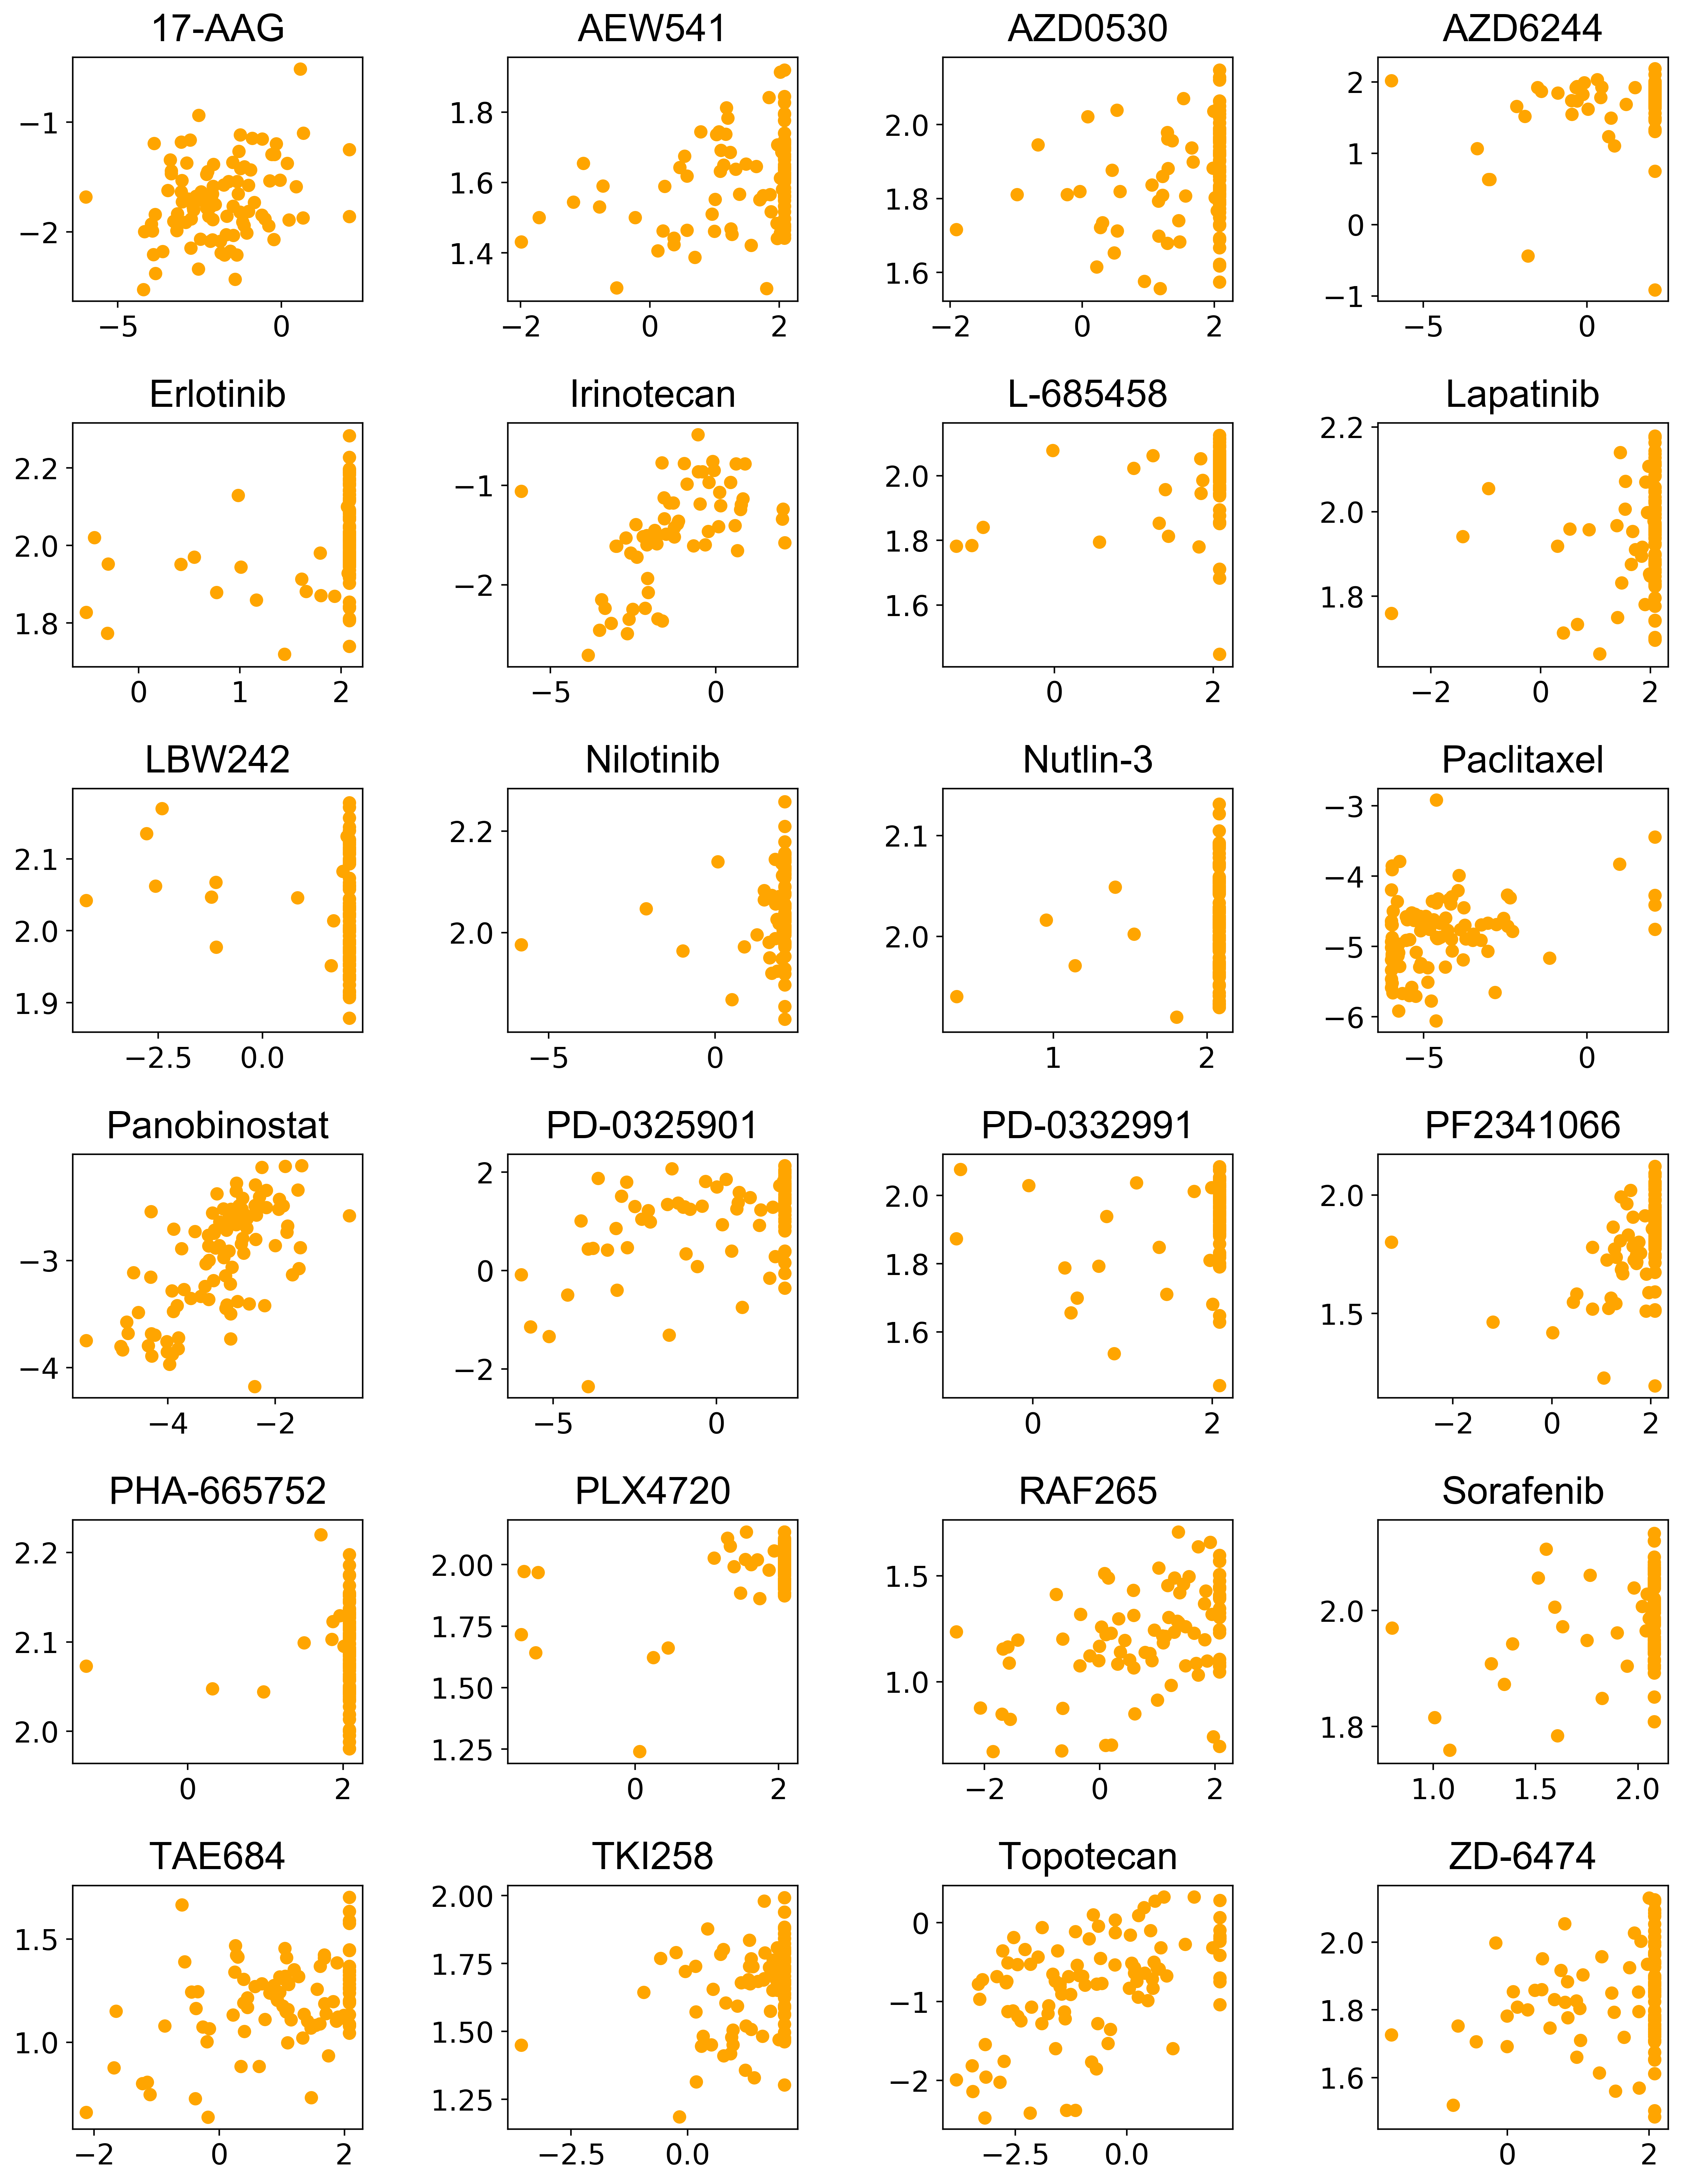

In [13]:
rmselist = []
r2list = []

# drug_list = ["Topotecan"]
fig = plt.figure(figsize=(15,20),dpi=400)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for num in range(len(drug_list)):
    dname = drug_list[num]
    print('%s_//n' % dname)
    dataset = np.load(workdir + "//191212_EC11K_%s.npz" % dname) # input file names. please make indified prefix of each file names
    x = dataset['x']
    y = dataset['y']
    train_X, test_X, train_y, test_y = train_test_split(x,y,test_size=0.2,random_state=42)
    
    train_X = train_X.reshape(train_X.shape[0], train_X.shape[1],1)
    test_X = test_X.reshape(test_X.shape[0], test_X.shape[1],1)
    
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    print('train_X shape:', train_X.shape)
    print(train_X.shape[0], 'train samples')
    print(test_X.shape[0], 'test samples')
    
    # https://towardsdatascience.com/how-to-perform-lasso-and-lasso-regression-in-python-3b3b75541ad8
    # https://brunch.co.kr/@itschloe1/11
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)

    # In[10]: architecutre
    with K.tf.device('/GPU:0'):
        inputs = Input(shape=(train_X.shape[1],1),name='inputs')

        conv_cell_line_1 = Conv1D(filters=50, kernel_size=700, strides=5, activation='tanh')(inputs)
        maxpool_cell_line_1 = MaxPooling1D(pool_size=5)(conv_cell_line_1)
        conv_cell_line_2 = Conv1D(filters=30, kernel_size=5, strides=2, activation='relu')(maxpool_cell_line_1)
        maxpool_cell_line_2 = MaxPooling1D(pool_size=10)(conv_cell_line_2)
        flatten_cell_line = Flatten()(maxpool_cell_line_2)
        dense_cell_line = Dense(100, activation='relu')(flatten_cell_line)
        dropout_cell_line = Dropout(0.1)(dense_cell_line)

        dense_1 = Dense(300, activation='tanh')(dropout_cell_line)
        dropout_1 = Dropout(0.1)(dense_1)
        reshape_1 = Reshape((300, 1))(dropout_1)
        conv_1 = Conv1D(filters=30, kernel_size=150, strides=1, activation='relu')(reshape_1)
        maxpool_1 = MaxPooling1D(pool_size=2)(conv_1)
        conv_2 = Conv1D(filters=10, kernel_size=5, strides=1, activation='relu')(maxpool_1)
        maxpool_2 = MaxPooling1D(pool_size=3)(conv_2)
        conv_3 = Conv1D(filters=5, kernel_size=5, strides=1, activation='relu')(maxpool_2)
        maxpool_3 = MaxPooling1D(pool_size=3)(conv_3)
        dropout_2 = Dropout(0.1)(maxpool_3)
        flatten = Flatten()(dropout_2)
        dropout_3 = Dropout(0.2)(flatten)

        predictions = Dense(1, activation='linear')(dropout_3)



        model = Model(inputs=inputs, outputs=predictions, name='Test_v2_DNN20190327')
        model.compile(loss=keras.losses.mean_squared_error,
                      optimizer=keras.optimizers.Adam(learning_rate),
                      metrics=['mse','mae'])
    
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)
    with K.tf.device('/GPU:0'):
        model_train = model.fit(train_X, train_y, batch_size=batch_size,epochs=training_epochs,verbose=1,
                            validation_data=(test_X, test_y))

    EndTime8 = datetime.now()
    print("EndTime :", EndTime8)
    
    predicted_classes = model.predict(test_X)
    predicted_value = predicted_classes
        
    a = pd.DataFrame(predicted_value)
    b = pd.DataFrame(test_y)
    c = pd.concat([a,b], axis=1)
    c.columns=["Predicted","Test"]
    workdir = "E://Ronny_TF//DrugResponsivenessGuidelines//Experiments//191205_rerun//ResNet//Result//EC-11K_individual_drugs//191212//CNN//one_drug_one_model"
    c.to_csv(workdir + '//%s_result.csv' % dname)
    
    
    rse = ((b[0]-a[0])**2).sum()
    mse = rse / len(b)
    rmse = np.sqrt(mse)
    print("%s’s final rmse value is = %f" % (dname,rmse))
    r2_value = r2_score(b,a)
    print("%s R-squared value is = %f" % (dname,r2_value))
    rmselist.append(rmse)
    r2list.append(r2_value)
          
    plt.subplot(6,4,num+1)
    plt.scatter(test_y,predicted_value,c='orange')
    plt.title(dname,fontdict ={'fontsize' : 20},fontname="Arial",y = 1.02)
    plt.tick_params(labelsize=15)
    
#     plt.scatter(test_y,predicted_value,c='red')
#     plt.xlabel('test_IC50_value')
#     plt.ylabel('predicted_IC50_value')
#     plt.savefig(workdir + '//%s_test_scatterplot.png' % dname)
    
    workdir = "E://Ronny_TF//DrugResponsivenessGuidelines//Experiments//191205_rerun//ResNet//Dataset//EC11K_Znorm//191212_EC11K_individual_drugs"
workdir = "E://Ronny_TF//DrugResponsivenessGuidelines//Experiments//191205_rerun//ResNet//Result//EC-11K_individual_drugs//191212//CNN"

plt.savefig(workdir +'//191210_EC11K_one_drug_one_model_24drugs_CNN.png', dpi=400)
workdir = "E://Ronny_TF//DrugResponsivenessGuidelines//Experiments//191205_rerun//ResNet//Dataset//EC11K_Znorm//191212_EC11K_individual_drugs"

In [14]:
print("This is lasso regression with expression dataset for each drugs")
a = pd.DataFrame(drug_list)
b = pd.DataFrame(rmselist)
c =pd.DataFrame(r2list)
result = pd.concat([a,b,c],axis=1)
result.columns = ['Drug','RMSE','R2value']

This is lasso regression with expression dataset for each drugs


In [15]:
result

,Drug,RMSE,R2value
0,17-AAG,1.334784,0.058283
1,AEW541,0.919380,0.036656
2,AZD0530,0.794883,-0.028392
3,AZD6244,1.520192,0.013490
4,Erlotinib,0.560236,0.023682
5,Irinotecan,1.365028,0.218108
6,L-685458,0.598328,0.060171
7,Lapatinib,0.731979,0.003017
8,LBW242,1.188963,-0.085755
9,Nilotinib,1.083710,-0.051790


In [16]:
workdir = "E://Ronny_TF//DrugResponsivenessGuidelines//Experiments//191205_rerun//ResNet//Result//EC-11K_individual_drugs//191212//CNN"
result.to_csv(workdir +'//191212_EC11K_one_drug_one_model_CNN_24drugs_metrics.csv')